Using CLASS to calculate matter Power spectrum with cosmological parameters given by Creasey et. al. 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
#from scipy.interpolate import InterpolatedUnivariateSpline as spline 

In [2]:
from classy import Class

In [3]:

# number of bins in k-space 
kbins     = 5000

# Cosmological parameters from Creasey et. al. 2018 paper
h         = 0.673
z         = 0.0
Omega_m   = 0.315
Omega_b   = 0.022032
sigma8    = 0.829
n_s       = 0.9603
LCDM      = Class()

LCDM.set({'Omega_b'  : Omega_b ,
          'Omega_cdm': Omega_m - Omega_b ,
          'h'        : h ,
          'A_s'      : 2e-9,
          #'sigma8'   : sigma8,             # amplitude of density fluctuations sigma8
          'n_s'      : n_s ,
          'tau_reio' : 0.0925,
          'z_pk'     : z})

LCDM.set({'output'       :'mPk',
          'P_k_max_1/Mpc':100.0})

LCDM.compute()


In [4]:
f = LCDM.scale_independent_growth_factor_f(z)
D = LCDM.scale_independent_growth_factor(z)

In [5]:
print(f, D)

0.5270829542727592 1.0


In [6]:
kk = np.logspace(-4, 2, kbins)
#kk = np.logspace(-4, 2, kbins)
Pk = []
for k in kk :
    Pk.append(LCDM.pk(k, z))

In [7]:
kk_f = np.full_like(kk, 0)
Pk_f = np.full_like(Pk,0)

# change unit of power spectrum
for i in range(0,kbins):
    kk_f[i] = kk[i]/h
    Pk_f[i] = Pk[i]*h**3

Text(0, 0.5, 'P(k)[$(h^{-1}Mpc)^3$]')

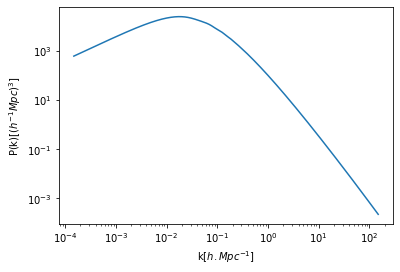

In [8]:

plt.loglog(kk_f, Pk_f)
#plt.ylim(1,)
plt.xlabel('k$[h.Mpc^{-1}]$')
plt.ylabel('P(k)[$(h^{-1}Mpc)^3$]')

In [9]:
LambdaCDM = Class()
z = 0.0
# pass input parameters
LambdaCDM.set({'omega_b'  :0.022032,
               'omega_cdm':0.315-0.022032,
               'h'        :0.673,
               'A_s'      :2e-9,
               #'sigma8'   :0.829, #why sigma8 doesnt work here!?!
               'n_s'      :0.9603,
               'tau_reio' :0.0925,
               'z_pk'     :z})
LambdaCDM.set({'output':'mPk','P_k_max_1/Mpc':100.0})
# run class
LambdaCDM.compute()

In [10]:
f = LambdaCDM.scale_independent_growth_factor_f(z)
D = LambdaCDM.scale_independent_growth_factor(z)
print(f,D)

0.8194801587982831 1.0


why the input of sigma8 doesnt work? It worked in my previous project on Mac